In [1]:
# Import libraries
import itertools
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

In [2]:
# Load dataset
data = pd.read_csv('guns.csv')
data = data.drop(data.columns[0], axis=1)
print('The shape of the dataset is (%d, %d)' % (data.shape[0], data.shape[1]))
data

The shape of the dataset is (100798, 10)


,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0
5,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,1.0
6,2012,2,Undetermined,0,M,48.0,White,100,Home,2.0
7,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,2.0
8,2012,2,Accidental,0,M,50.0,White,100,Other specified,3.0
9,2012,2,Suicide,0,M,NaN,Black,998,Home,5.0


### Missing Data/Pre-Processing

Here we get a sense of how many missing values are in each feature, and how many missing values are there in total. 

For dataset larger than 100000, it is common practice to just ignore the missing values if the size of the missing  values is less than 10% of the entire dataset. It is also crucial to observe if your missing values are MCAR (Missing Completely At Random), MAR (Missing At Random), or MNAR(Missing Not At Random).

However, because the idea right now is to just get a quick and dirty implementation of logistic regression, I will not spend too much time on this just yet. Maybe I will come back to this later when I want a slight boost in my classification accuracy/F1 score. 

Our domain knowledge tells us the features "year" and "month" are irrelevant to the output we are trying to predict. Therefore, we will remove these two features from our dataset. 

We will also apply one-hot-encoding for all regular categorical features (with no ordinal order).

In [3]:
# Determine the number of missing values in each feature
missing_feature = data.isnull().sum()

# Determine the total number of missing values
missing = data.isnull().sum().sum()

print('The number of missing values in each feature:')
print(missing_feature)
print('\n')
print('The total number of data points with missing values: %d' % missing)

The number of missing values in each feature:
year            0
month           0
intent          1
police          0
sex             0
age            18
race            0
hispanic        0
place        1384
education      53
dtype: int64


The total number of data points with missing values: 1456


In [4]:
#data["place"] = data.groupby("race").transform(lambda x: x.fillna( x.value_counts().idxmax() ))["place"]
data["education"] = data.groupby("race").transform(lambda x: x.fillna( x.value_counts().idxmax() ))["education"]
#data["age"] = data.groupby("race").transform(lambda x: x.fillna( x.value_counts().idxmax() ))["age"]
# data


In [5]:
data.isnull().sum()

year            0
month           0
intent          1
police          0
sex             0
age            18
race            0
hispanic        0
place        1384
education       0
dtype: int64

In [6]:
# Create another dataset without the missing values
data_nm = data.dropna(axis=0, how='any').reset_index(drop=True)
print('The shape of the dataset is (%d, %d)' % (data_nm.shape[0], data_nm.shape[1]))

The shape of the dataset is (99396, 10)


In [7]:
# Min-max scale
min_max_scaler = preprocessing.MinMaxScaler()
data_age_minmax = min_max_scaler.fit_transform(np.float32(data_nm['age'].reshape(-1,1)))
data_nm['age'] = data_age_minmax

data_education_minmax = min_max_scaler.fit_transform(np.float32(data_nm['education'].reshape(-1,1)))
data_nm['education'] = data_education_minmax

data_hispanic_minmax = min_max_scaler.fit_transform(np.float32(data_nm['hispanic'].reshape(-1,1)))
data_nm['hispanic'] = data_hispanic_minmax

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [8]:
# Remove "year" and "month"
data_nm = data_nm.drop(['year', 'month'], axis=1)
data_nm.head()

# Separate features and target label
X = data_nm.drop('race', axis=1)
y = data_nm['race']

# One-hot-encode the data
X_dummies = pd.get_dummies(X)
X_dummies.head()
print('The shape of the dummy dataset is (%d, %d)' % (X_dummies.shape[0], X_dummies.shape[1]))
X_dummies.head()

The shape of the dummy dataset is (99396, 20)


,police,age,hispanic,education,intent_Accidental,intent_Homicide,intent_Suicide,intent_Undetermined,sex_F,sex_M,place_Farm,place_Home,place_Industrial/construction,place_Other specified,place_Other unspecified,place_Residential institution,place_School/instiution,place_Sports,place_Street,place_Trade/service area
0,0,0.317757,0.0,0.75,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0.196262,0.0,0.50,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0.560748,0.0,0.75,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0.598131,0.0,0.75,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,0.289720,0.0,0.25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [9]:
# See the distribution of each value in our target variable
distribution = y.value_counts() / y.count()
print(distribution)

White                             0.659262
Black                             0.230794
Hispanic                          0.087941
Asian/Pacific Islander            0.013039
Native American/Native Alaskan    0.008964
Name: race, dtype: float64


### Train/Test Split

In [10]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=24, stratify = y)


print('The size of X_train is: (%d, %d)' % (X_train.shape[0], X_train.shape[1]))
print('The size of y_train is: (%d)' % (y_train.shape[0]))
print('The size of X_test is: (%d, %d)' % (X_test.shape[0], X_test.shape[1]))
print('The size of y_test is: (%d)' % (y_test.shape[0]))

The size of X_train is: (79516, 20)
The size of y_train is: (79516)
The size of X_test is: (19880, 20)
The size of y_test is: (19880)


### Logistic Regression - Quick and Dirty Implementation

In [11]:
# Fit a logistic regression model using X_train and y_train with default parameters
log_reg = LogisticRegression(max_iter = 300)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# Target names
target_names = ['Asian/Pacific Islander', 'Black', 'Hispanic ', 'White', 'Native American/Native Alaskan']

# Classification accuracy on X_train
X_train_predict = log_reg.predict(X_train)
X_train_accuracy = metrics.accuracy_score(y_train, X_train_predict)
print("The classification accuracy for X_train is: %f" % X_train_accuracy)

# Classification accuracy on X_test
X_test_predict = log_reg.predict(X_test)
X_test_accuracy = metrics.accuracy_score(y_test, X_test_predict)
print("The classification accuracy for X_test is: %f" % X_test_accuracy)

# F1 score on X_train
f1_xtrain = metrics.f1_score(y_train, X_train_predict, average = 'weighted')
print("The f1 score for X_train is: %f" % f1_xtrain)

# F1 score on X_test
f1_xtest = metrics.f1_score(y_test, X_test_predict, average = 'weighted')
print("The f1 score for X_test is: %f" % f1_xtest)

# Confusion Matrix on X_train
X_train_confusion = metrics.confusion_matrix(y_train, X_train_predict, labels = target_names)
print('Confusion matrix for X_train:')
print(X_train_confusion)

The classification accuracy for X_train is: 0.860544
The classification accuracy for X_test is: 0.863129


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The f1 score for X_train is: 0.851608
The f1 score for X_test is: 0.854043
Confusion matrix for X_train:
[[    0   318     0   717     0]
 [    0 14377     0  3920     0]
 [    0     0     0     0     0]
 [    0  4469     0 47782     0]
 [    0   209     0   501     0]]


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    0   318     0   717     0]
 [    0 14377     0  3920     0]
 [    0     0     0     0     0]
 [    0  4469     0 47782     0]
 [    0   209     0   501     0]]


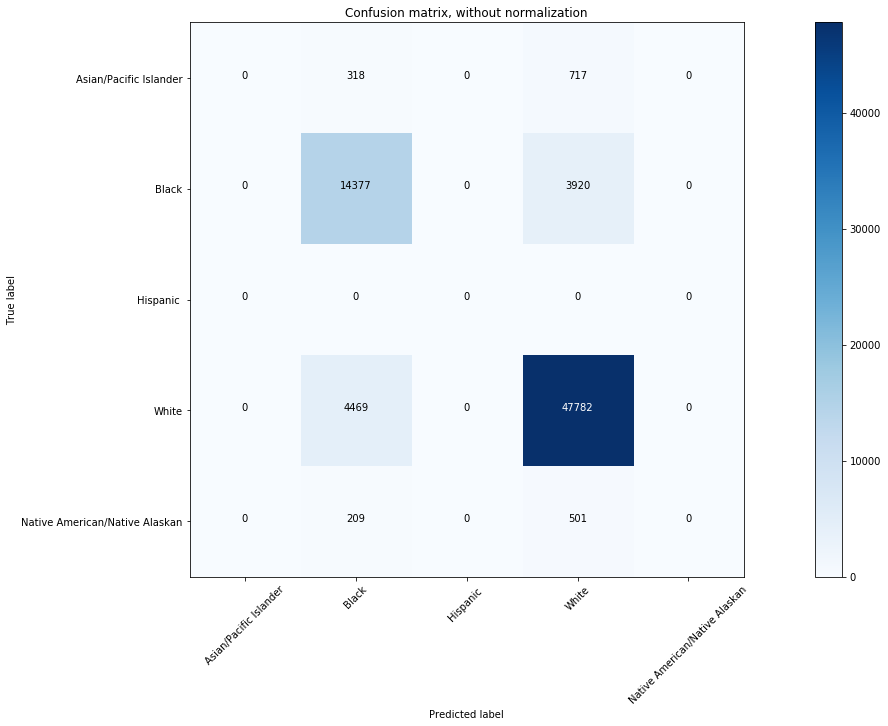

In [15]:
plt.figure(figsize=(20,10))
plot_confusion_matrix(X_train_confusion, classes=target_names,
                      title='Confusion matrix, without normalization')

### Diagonosing Bias vs. Variance

The F1-scores for training set and validation set are roughly 0.85 and 0.85 respectively. Both F1-scores are low and roughly equal, therefore, it is more probable that we have a high bias (underfitting) model. To be certain, let's plot a learning curve and try to diagnose what we can do to improve our model. 

### Cross-Validation 

In [252]:
log_reg_2 = LogisticRegression(max_iter = 150)

In [254]:
# F1 Scorer
f1_scorer = metrics.make_scorer(metrics.f1_score, average='weighted')

# C list
C_list = [1, 5, 30, 50, 80 ,100, 300, 500, 800] # 3, 1000, 1200, 1400, 1600

# Solver
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Param grid
param_grid = dict(C = C_list)

In [255]:
grid = GridSearchCV(log_reg_2 , param_grid, cv = 3, scoring = f1_scorer)
grid.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classi

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 30, 50, 80, 100, 300, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [256]:
grid.grid_scores_

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85032, std: 0.00253, params: {'C': 1},
 mean: 0.85265, std: 0.00211, params: {'C': 5},
 mean: 0.85308, std: 0.00217, params: {'C': 30},
 mean: 0.85310, std: 0.00217, params: {'C': 50},
 mean: 0.85315, std: 0.00219, params: {'C': 80},
 mean: 0.85315, std: 0.00217, params: {'C': 100},
 mean: 0.85316, std: 0.00219, params: {'C': 300},
 mean: 0.85316, std: 0.00219, params: {'C': 500},
 mean: 0.85318, std: 0.00220, params: {'C': 800}]

In [257]:
final_log_reg = grid.best_estimator_
final_log_reg

LogisticRegression(C=800, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [258]:
# Predict on X_test
final_test_prediction = final_log_reg.predict(X_test)
final_classification = metrics.classification_report(y_test, final_test_prediction, target_names = target_names)
f1_final = metrics.f1_score(y_test, final_test_prediction, average = 'weighted')

print(final_classification)
f1_final

                                precision    recall  f1-score   support

        Asian/Pacific Islander       0.00      0.00      0.00       259
                         Black       0.75      0.79      0.77      4588
                     Hispanic        0.96      0.92      0.94      1749
                         White       0.00      0.00      0.00       178
Native American/Native Alaskan       0.89      0.91      0.90     13106

                   avg / total       0.85      0.86      0.86     19880



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8554951643729497

In [259]:
bg = ensemble.BaggingClassifier(base_estimator = LogisticRegression(max_iter=300, C = 500) , n_estimators = 15, max_samples = 1.0, max_features = 1.0,
                          bootstrap = True, bootstrap_features = False, random_state= 24)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=15, n_jobs=1, oob_score=False,
         random_state=24, verbose=0, warm_start=False)

In [260]:
ensemble_prediction_train = bg.predict(X_train)
f1_ensemble_train = metrics.f1_score(y_train, ensemble_prediction_train, average = 'weighted')


ensemble_prediction_test = bg.predict(X_test)
f1_ensemble_test = metrics.f1_score(y_test, ensemble_prediction_test, average = 'weighted')

final_classification_ensemble = metrics.classification_report(y_test, ensemble_prediction_test, target_names = target_names)


print(f1_ensemble_train)
print(f1_ensemble_test)
print(final_classification_ensemble)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.853425000859
0.855694827402
                                precision    recall  f1-score   support

        Asian/Pacific Islander       0.00      0.00      0.00       259
                         Black       0.75      0.79      0.77      4588
                     Hispanic        0.96      0.92      0.94      1749
                         White       0.00      0.00      0.00       178
Native American/Native Alaskan       0.89      0.91      0.90     13106

                   avg / total       0.85      0.86      0.86     19880



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [261]:
# Predict on X_train using the best estimator
final_prediction = final_log_reg.predict(X_train)

In [262]:
# Class distribution of the predicted examples
final_prediction_1 = pd.Series(final_prediction)
class_distribution = final_prediction_1.value_counts() / final_prediction_1.count()
class_distribution

White       0.672242
Black       0.244202
Hispanic    0.083556
dtype: float64

In [263]:
# Class distribution of the misclassified examples
misclassified = y_train[final_prediction != y_train]
misclassified.value_counts() / misclassified.count()

White                             0.426134
Black                             0.361347
Asian/Pacific Islander            0.094625
Native American/Native Alaskan    0.065061
Hispanic                          0.052833
Name: race, dtype: float64

### Degree of Freedom

In [273]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_train.shape
X_train_poly.shape

(79516, 231)

In [274]:
log_reg_3 = LogisticRegression(max_iter = 150, C = 500)
polylog = log_reg_3.fit(X_train_poly, y_train)

In [277]:
X_test_poly = poly.fit_transform(X_test)
poly_prediction_test = polylog.predict(X_test_poly)
f1_poly_test = metrics.f1_score(y_test, poly_prediction_test, average = 'weighted')

final_classification_poly = metrics.classification_report(y_test, poly_prediction_test, target_names = target_names)

print(f1_poly_test)
print(final_classification_poly)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.866331407665
                                precision    recall  f1-score   support

        Asian/Pacific Islander       0.00      0.00      0.00       259
                         Black       0.76      0.77      0.77      4588
                     Hispanic        1.00      1.00      1.00      1749
                         White       0.00      0.00      0.00       178
Native American/Native Alaskan       0.90      0.92      0.91     13106

                   avg / total       0.86      0.88      0.87     19880

['Black' 'Black' 'Hispanic' 'White' 'Black' 'White' 'Hispanic' 'White'
 'Black' 'White' 'Black' 'Black' 'Black' 'White' 'White' 'White' 'Hispanic'
 'Black' 'White' 'White' 'White' 'Hispanic' 'White' 'White' 'Black' 'White'
 'White' 'Black' 'Black' 'White' 'White' 'White' 'Black' 'Black' 'White'
 'White' 'Black' 'Hispanic' 'White' 'White' 'White' 'White' 'White' 'White'
 'Black' 'White' 'White' 'White' 'Black' 'White' 'Black' 'White' 'Hispanic'
 'White' 'White' 'Hispanic' 'W

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [270]:
bg = ensemble.BaggingClassifier(base_estimator = LogisticRegression(max_iter=150, C = 500) , n_estimators = 15, max_samples = 1.0, max_features = 1.0,
                          bootstrap = True, bootstrap_features = False, random_state= 24)
bg.fit(X_train_poly, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=15, n_jobs=1, oob_score=False,
         random_state=24, verbose=0, warm_start=False)

In [271]:
ensemble_prediction_train = bg.predict(X_train_poly)
f1_ensemble_train = metrics.f1_score(y_train, ensemble_prediction_train, average = 'weighted')


ensemble_prediction_test = bg.predict(X_test_poly)
f1_ensemble_test = metrics.f1_score(y_test, ensemble_prediction_test, average = 'weighted')

final_classification_ensemble = metrics.classification_report(y_test, ensemble_prediction_test, target_names = target_names)


print(f1_ensemble_train)
print(f1_ensemble_test)
print(final_classification_ensemble)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.863137463678
0.866025963586
                                precision    recall  f1-score   support

        Asian/Pacific Islander       0.00      0.00      0.00       259
                         Black       0.76      0.77      0.77      4588
                     Hispanic        1.00      1.00      1.00      1749
                         White       0.00      0.00      0.00       178
Native American/Native Alaskan       0.90      0.92      0.91     13106

                   avg / total       0.86      0.88      0.87     19880



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# Train the best model using ALL of the data